(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

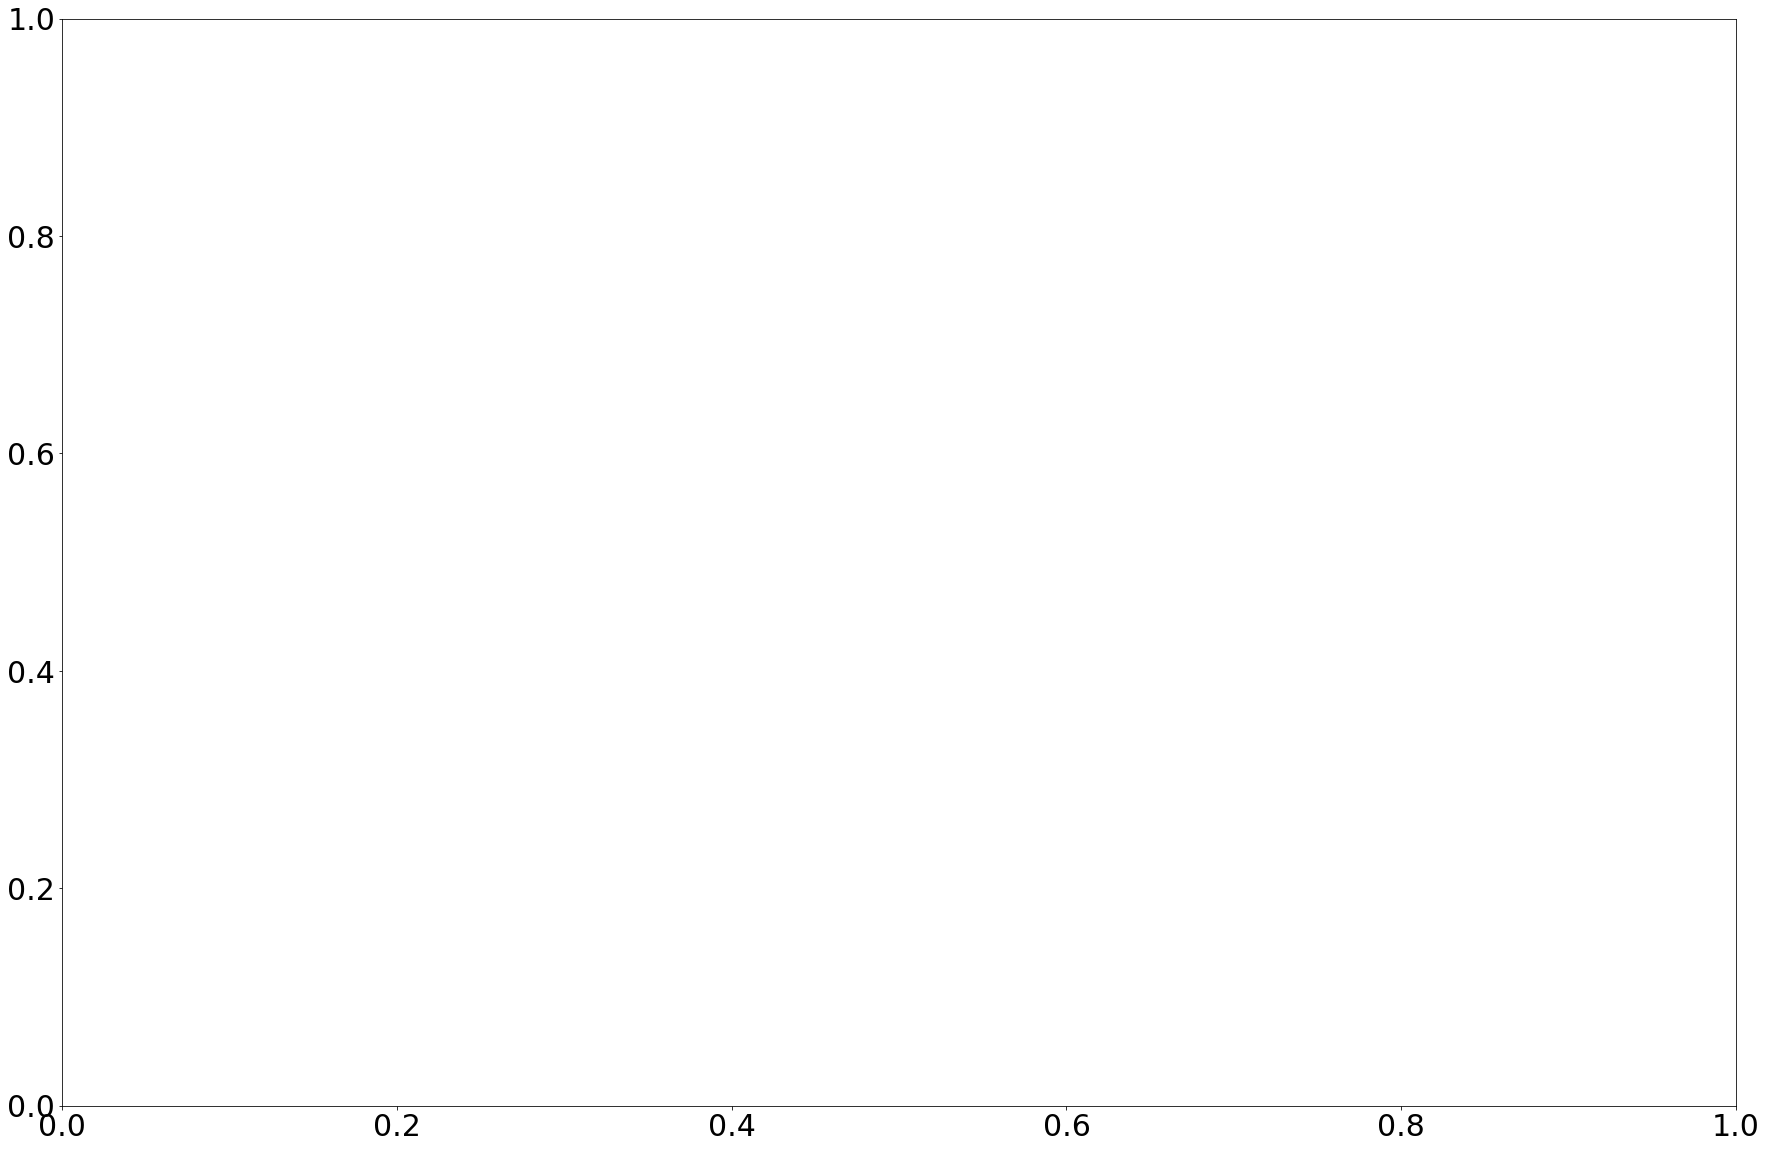

In [5]:
# Importing the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Some Matplotlib settings
from pylab import rcParams
rcParams['figure.figsize'] = 30, 20
plt.rc('axes', labelsize='35')
plt.xticks(fontsize='30')
plt.yticks(fontsize='30')



In [6]:

df = pd.read_excel('to_process_in_python.xlsx')   


In [7]:
df

,GRB Name,Obs_ID,z,1+z,T90_raw(s),T90_raw_error,T50_raw(s),T50_raw_error,E1_obsframe(KeV),E2_obsframe(KeV),T90_(s),T90_error,T50_(s),T50_error
0,180728A,850471,0.117,1.1170,8.688,0.321,2.464,0.035,125.330000,313.339302,5.280,2.197,1.824,0.230
1,60614,214805,0.127,1.1380,109.264,3.415,43.296,0.790,123.022847,307.557118,18.320,4.113,11.344,6.051
2,150727A,650530,0.313,1.3130,86.128,12.748,30.192,3.624,106.626047,266.565118,23.904,4.388,14.976,6.150
3,130427A,554620,0.34,1.3400,316.272,7.630,32.064,1.296,104.477612,261.194030,128.336,4.859,4.016,0.079
4,61021,234905,0.3463,1.3463,46.448,5.200,10.240,1.125,103.988710,259.971774,4.928,0.861,2.128,0.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,60927,231362,5.6,6.6000,22.528,1.277,15.792,5.217,21.212121,53.030303,21.248,1.395,16.320,5.891
243,130606A,557589,5.913,6.9130,163.088,2.983,71.696,5.921,20.251700,50.629249,163.344,2.805,77.296,64.377
244,50904,153514,6.2,7.2000,179.500,10.300,85.400,7.600,19.444444,48.611111,187.744,14.269,87.216,8.845
245,140515A,599037,6.32,7.3200,23.456,2.048,9.776,5.341,19.125683,47.814208,23.136,1.958,10.048,5.955


In [8]:
df.drop(["GRB Name", "Obs_ID", "T90_raw(s)", "1+z", "T90_raw_error", "T50_raw(s)", "T50_raw_error", "E1_obsframe(KeV)","E2_obsframe(KeV)",  ],axis=1,inplace=True)


In [9]:
df

,z,T90_(s),T90_error,T50_(s),T50_error
0,0.117,5.280,2.197,1.824,0.230
1,0.127,18.320,4.113,11.344,6.051
2,0.313,23.904,4.388,14.976,6.150
3,0.34,128.336,4.859,4.016,0.079
4,0.3463,4.928,0.861,2.128,0.714
...,...,...,...,...,...
242,5.6,21.248,1.395,16.320,5.891
243,5.913,163.344,2.805,77.296,64.377
244,6.2,187.744,14.269,87.216,8.845
245,6.32,23.136,1.958,10.048,5.955


In [10]:
df = df.astype(float)       #converting all the data points to float for further analysis

In [11]:
df_split= np.array_split(df, 6)    #splitting the dataframe into 6 equal bins, for our analysis.
type(df_split)

list

In [12]:
#renaming the splitted dataframes

df1=df_split[0]
df2=df_split[1]
df3=df_split[2]
df4=df_split[3]
df5=df_split[4]
df6=df_split[5]

In [14]:
# Code to calculate geometric means of the burst intervals of T90 and T50 for the binned data

#Initialising the array of burst intervals and redshifts
T90_gm=np.zeros(6)
T50_gm=np.zeros(6)
z_gm=np.zeros(6)

import scipy.stats

for i in range(0,6):
    T90_gm[i]=scipy.stats.gmean(df_split[i]["T90_(s)"])
    T50_gm[i]=scipy.stats.gmean(df_split[i]["T50_(s)"])
    
    #now for redshift geometric means in binned data
    z_gm[i]= scipy.stats.gmean(df_split[i]["z"])
    



In [96]:
T90_gm, T50_gm, z_gm

array([ 9.63132433, 14.69275756, 39.46154895, 28.05795033, 49.4769422 ,
       48.01566765])

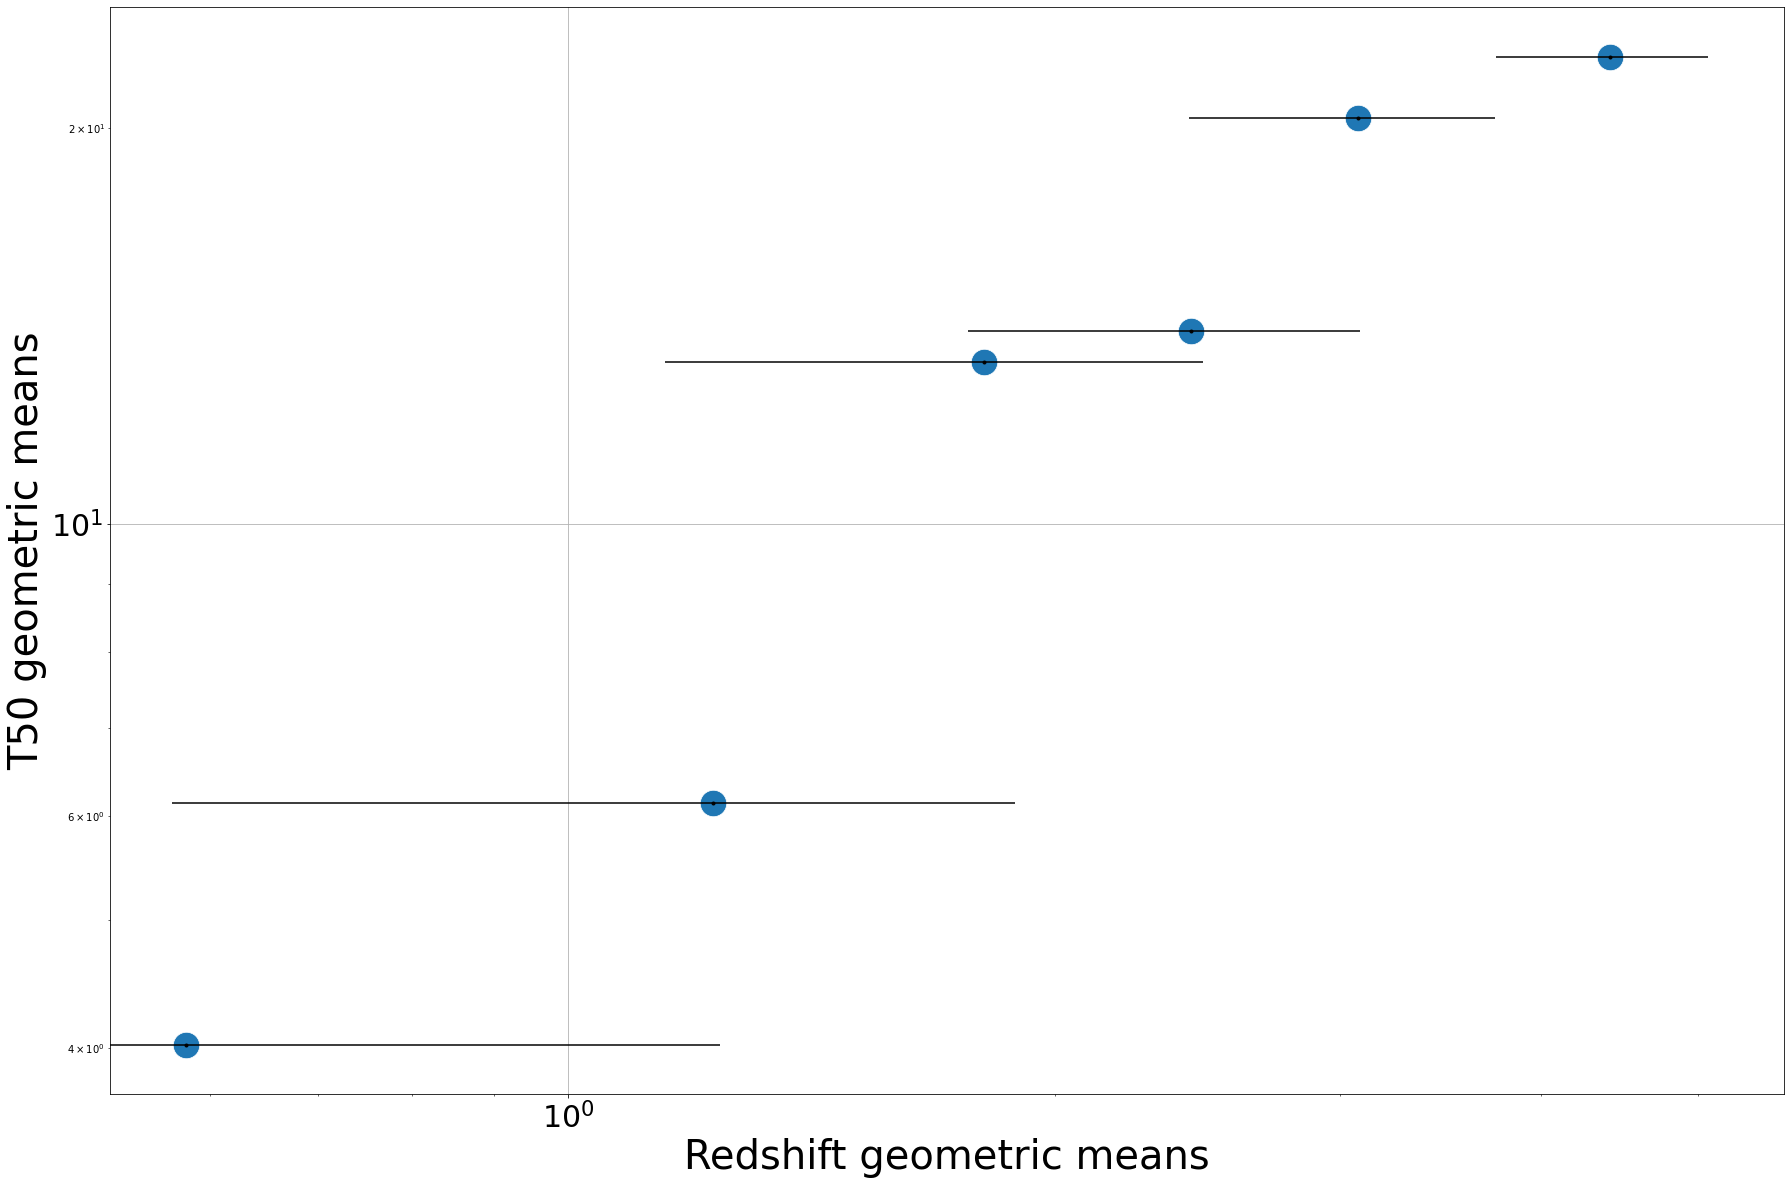

In [16]:
#plotting the T50 geometric means (without y errors). We will calculate the errors in the next step

%matplotlib inline

#Some Matplotlib settings
from pylab import rcParams
rcParams['figure.figsize'] = 30, 20
plt.rc('axes', labelsize='35')
plt.xticks(fontsize='30')
plt.yticks(fontsize='30')


import seaborn as sns
sns.scatterplot(x=z_gm, y= T50_gm, markers=True, s=700)


plt.xlabel("Redshift geometric means",fontsize='40')
plt.ylabel("T50 geometric means",fontsize='40')
plt.grid()

n,bin_edges=np.histogram(df['z'],bins=6)
x_mid = 0.5 * (bin_edges[1:] + bin_edges[:-1])  
xbin=0.5*(bin_edges[1]-bin_edges[0])
plt.errorbar(z_gm,T50_gm,yerr=0 ,xerr=xbin,fmt='.k')
plt.yscale('log')
plt.xscale('log')

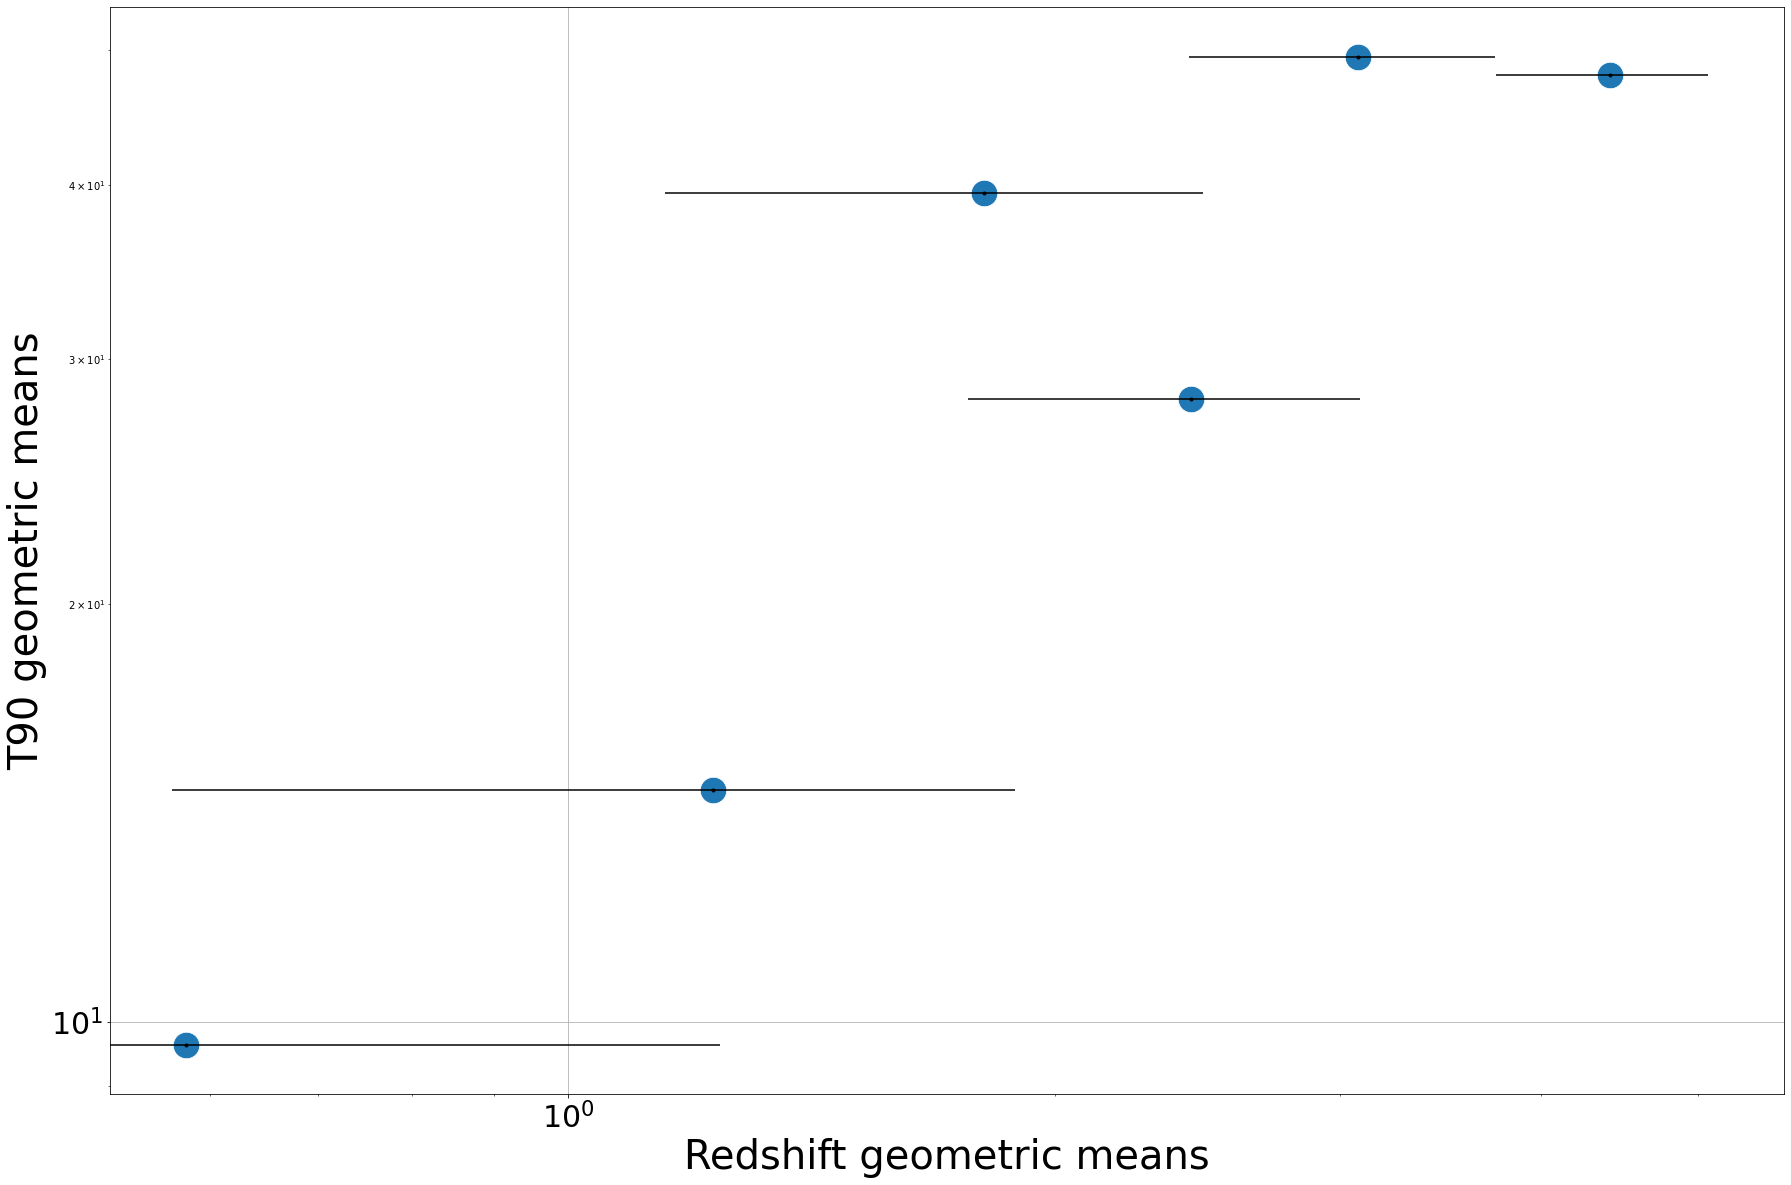

In [17]:
#plotting the T90 geometric means (without y errors). We will calculate the errors in the next step


%matplotlib inline

#Some Matplotlib settings
from pylab import rcParams
rcParams['figure.figsize'] = 30, 20
plt.rc('axes', labelsize='35')
plt.xticks(fontsize='30')
plt.yticks(fontsize='30')


import seaborn as sns
sns.scatterplot(x=z_gm, y= T90_gm, markers=True, s=700)


plt.xlabel("Redshift geometric means",fontsize='40')
plt.ylabel("T90 geometric means",fontsize='40')
plt.grid()


n,bin_edges=np.histogram(df['z'],bins=6)
x_mid = 0.5 * (bin_edges[1:] + bin_edges[:-1])  
xbin=0.5*(bin_edges[1]-bin_edges[0])
plt.errorbar(z_gm,T90_gm,yerr=0 ,xerr=xbin,fmt='.k')
plt.yscale('log')
plt.xscale('log')

In [18]:
#Code to generate the GM errors in T90s and T50s

#We divide the bins into ALPHA, BETA, GAMMA,...SIGMA where A,...F are functions of GM (abcd...n)^(1/n)

In [107]:
#for T90 GM errors

ALPHA=pow(df1['T90_(s)'].product(),(1/42))
BETA=pow(df2['T90_(s)'].product(), (1/41))
GAMMA=pow(df3['T90_(s)'].product(),(1/41))
DELTA=pow(df4['T90_(s)'].product(),(1/41))
PHI=pow(df5['T90_(s)'].product(),(1/41))
SIGMA=pow(df6['T90_(s)'].product(),(1/41))

In [125]:
#For T50 GM errors

alpha=pow(df1['T50_(s)'].product(),(1/42))
beta=pow(df2['T50_(s)'].product(),(1/41))
gamma=pow(df3['T50_(s)'].product(),(1/41))
delta=pow(df4['T50_(s)'].product(),(1/41))
phi=pow(df5['T50_(s)'].product(),(1/41))
sigma=pow(df6['T50_(s)'].product(),(1/41))

In [127]:
#Calculating each term of the final delta equation as an array to calculate T90 errors

#TERMS1 denote array for bin1, TERMS2 for bin2, ...etc
TERMS1=np.zeros(42)
TERMS2=TERMS3=TERMS4=TERMS5=TERMS6=np.zeros(41)

#Converting arrays into float64 to not lose accuracy
TERMS1=TERMS1.astype(np.float64)
TERMS2=TERMS2.astype(np.float64)
TERMS3=TERMS3.astype(np.float64)
TERMS4=TERMS4.astype(np.float64)
TERMS5=TERMS5.astype(np.float64)
TERMS6=TERMS6.astype(np.float64)


for i in range(42):
    TERMS1[i]=(((df1['T90_error'][i])/(df1['T90_(s)'][i]))**2)
    
for i in range(41):
    TERMS2[i]=(((df2['T90_error'][42+i])/(df2['T90_(s)'][42+i]))**2) 
    TERMS3[i]=(((df3['T90_error'][83+i])/(df3['T90_(s)'][83+i]))**2)
    TERMS4[i]=(((df4['T90_error'][124+i])/(df4['T90_(s)'][124+i]))**2) 
    TERMS5[i]=(((df5['T90_error'][165+i])/(df5['T90_(s)'][165+i]))**2) 
    TERMS6[i]=(((df6['T90_error'][206+i])/(df6['T90_(s)'][206+i]))**2)

In [128]:
TERMS1,TERMS2,TERMS3,TERMS4,TERMS5,TERMS6

(array([1.73137949e-01, 5.04041715e-02, 3.36970651e-02, 1.43349704e-03,
        3.05256489e-02, 1.31401540e-01, 2.99072266e-01, 7.94582082e-02,
        8.48483069e-02, 5.72038332e-02, 3.02191921e-04, 5.31821016e-03,
        2.13017751e-03, 2.07350128e-01, 2.79216167e-03, 4.88463326e-02,
        3.69822485e-02, 1.48579189e-02, 4.01889017e-04, 2.56204765e-02,
        4.17782947e-02, 3.20236644e-02, 2.53863631e-02, 3.68805260e-01,
        7.11966069e-02, 1.80820994e-02, 8.37608618e-03, 1.92351050e-02,
        5.34765625e-02, 1.50156250e-01, 2.66097656e-02, 9.21257175e-03,
        2.02675786e-02, 5.21928565e-03, 8.68147463e-03, 4.03579401e-02,
        1.46438080e-02, 7.87483754e-03, 3.89915295e-02, 8.92997638e-01,
        4.71346953e-02, 3.35420164e-02]),
 array([2.46787117e-02, 7.14342615e-05, 1.01586584e-01, 3.63425070e-02,
        1.90947056e-02, 2.26405784e-03, 2.29285233e-02, 2.30017673e-02,
        2.93265625e-02, 5.65206906e-02, 5.95481664e-03, 5.88899004e-02,
        2.41597935e-01

In [129]:
ALPHA,BETA,GAMMA,DELTA,PHI,SIGMA

(9.631324325635747,
 13.782091800180577,
 36.15513457205266,
 25.916623503182553,
 45.08789148958798,
 43.78748929383651)

In [130]:
#Final error calculation for T90s

GM_error_1=(ALPHA/42)*(np.sum(TERMS1))**(0.5)
GM_error_2=(BETA/41)*(np.sum(TERMS2))**(0.5)
GM_error_3=(GAMMA/41)*(np.sum(TERMS3))**(0.5)
GM_error_4=(DELTA/41)*(np.sum(TERMS4))**(0.5)
GM_error_5=(PHI/41)*(np.sum(TERMS5))**(0.5)
GM_error_6=(SIGMA/41)*(np.sum(TERMS6))**(0.5)

In [131]:
GM_error_1,GM_error_2,GM_error_3,GM_error_4,GM_error_5,GM_error_6

(0.41148445648914456,
 0.8149292899298034,
 0.9786049900299798,
 0.776515995168444,
 1.662502447234307,
 3.477730428129039)

In [132]:
#Calculating each term of the final delta equation as an array to calculate T50 errors

#TERMS1 denote array for bin1, TERMS2 for bin2, ...etc
terms1=np.zeros(42)
terms2=terms3=terms4=terms5=terms6=np.zeros(41)

#Converting arrays into float64 to not lose accuracy
terms1=terms1.astype(np.float64)
terms2=terms2.astype(np.float64)
terms3=terms3.astype(np.float64)
terms4=terms4.astype(np.float64)
terms5=terms5.astype(np.float64)
terms6=terms6.astype(np.float64)


for i in range(42):
    terms1[i]=(((df1['T50_error'][i])/(df1['T50_(s)'][i]))**2)
    
for i in range(41):
    terms2[i]=(((df2['T50_error'][42+i])/(df2['T50_(s)'][42+i]))**2) 
    terms3[i]=(((df3['T50_error'][83+i])/(df3['T50_(s)'][83+i]))**2)
    terms4[i]=(((df4['T50_error'][124+i])/(df4['T50_(s)'][124+i]))**2)
    terms5[i]=(((df5['T50_error'][165+i])/(df5['T50_(s)'][165+i]))**2) 
    terms6[i]=(((df6['T50_error'][206+i])/(df6['T50_(s)'][206+i]))**2) 


In [133]:
terms1,terms2,terms3,terms4,terms5,terms6

(array([1.59003251e-02, 2.84525942e-01, 1.68639214e-01, 3.86960624e-04,
        1.12577909e-01, 2.64261204e-01, 2.50000000e-01, 2.33317772e+00,
        2.45581825e-01, 5.06250000e-02, 6.69096018e-04, 1.05783455e-02,
        1.57687971e-03, 3.90625000e-01, 2.12812013e-01, 6.28526086e-02,
        1.61431760e-01, 2.22624133e-02, 3.48314827e-04, 1.33921627e-01,
        3.95872003e-02, 5.18527413e-02, 7.32525992e-02, 6.07611125e+01,
        4.39626654e-01, 8.00294321e-02, 3.50241150e-01, 6.70519773e-02,
        1.64253248e-01, 6.00625000e-01, 2.18592736e-01, 1.91525829e-02,
        2.28313652e-02, 4.19373276e-03, 4.97279175e-04, 2.43103781e-01,
        1.09208016e-01, 6.49433167e-04, 5.80050362e-01, 1.45584139e+00,
        2.00629340e-01, 1.28029785e-01]),
 array([8.95678278e-02, 1.05380517e-04, 1.73859216e-01, 1.88612632e-02,
        6.99649733e-02, 9.18455562e-05, 4.42814813e-02, 7.69356405e-02,
        9.61000000e-02, 3.65501630e-01, 3.33681273e-03, 2.51428005e-02,
        1.95372392e-01

In [134]:
alpha,beta,gamma,delta,phi,sigma

(4.019977405650149,
 6.134752989365797,
 13.285968925057624,
 14.02416184959922,
 20.361875241149004,
 22.664864535103593)

In [135]:
#Final GM error calculation for T50s

gm_error_1=(alpha/42)*(np.sum(terms1))**(0.5)
gm_error_2=(beta/42)*(np.sum(terms2))**(0.5)
gm_error_3=(gamma/42)*(np.sum(terms3))**(0.5)
gm_error_4=(delta/42)*(np.sum(terms4))**(0.5)
gm_error_5=(phi/42)*(np.sum(terms5))**(0.5)
gm_error_6=(sigma/42)*(np.sum(terms6))**(0.5)

In [136]:
gm_error_1,gm_error_2,gm_error_3,gm_error_4,gm_error_5,gm_error_6

(0.8027021144183322,
 0.5808614954207605,
 1.7821143536615516,
 0.9783499612611003,
 1.6001427054535449,
 1.1510485168847875)